<a href="https://colab.research.google.com/github/khairihr/MachineLearning/blob/main/TaskWeek9/Wine_Quality_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Khairi Hibatullah Ridho

NIM: 1103228240

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# Mengganti 'path_to_file' dengan path file Anda
file_path = '/content/drive/MyDrive/Dataset MachineLearning/winequality-red.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- **fixed acidity**: Ini mengukur semua asam yang tidak mudah menguap dalam wine (asam tartarat, malat, dan lainnya).
- **volatile acidity**: Asam yang dapat menguap dari wine saat terpapar udara, terutama asam asetat.
- **citric acid**: Digunakan sebagai aditif untuk menambah 'kesegaran' dan rasa pada wines.
- **residual sugar**: Jumlah gula yang tersisa setelah fermentasi selesai, mempengaruhi kemanisan wine.
- **chlorides**: Jumlah garam dalam wine.
- **free sulfur dioxide**: Bagian dari SO2 yang tidak terikat pada molekul lain dan dapat membantu mencegah pertumbuhan mikroba dan oksidasi wine.
- **total sulfur dioxide**: Jumlah keseluruhan SO2 dalam wine, termasuk yang terikat dan bebas.
- **density**: Kepadatan wine, yang bisa terpengaruh oleh kandungan alkohol dan gula.
- **pH**: Menggambarkan seberapa asam atau basa wine tersebut pada skala 0 (sangat asam) hingga 14 (sangat basa); kebanyakan wine berada di kisaran 3-4.
- **sulphates**: Aditif yang bisa berkontribusi pada jumlah SO2 dalam wine, mempengaruhi resistensi terhadap mikroba dan oksidasi.
- **alcohol**: Persentase volume alkohol dalam wine.
- **quality**: Skor kualitas wine yang diberikan oleh pengujian, biasanya pada skala 0 hingga 10.

Data ini biasanya digunakan untuk model prediktif dalam menentukan kualitas wine berdasarkan karakteristik kimianya.

In [60]:
# Deskripsi statistik
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [61]:
# Cek missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Prompt: beri saya kode untuk melakukan Visualisasi EDA dari distribusi kulaitas wine

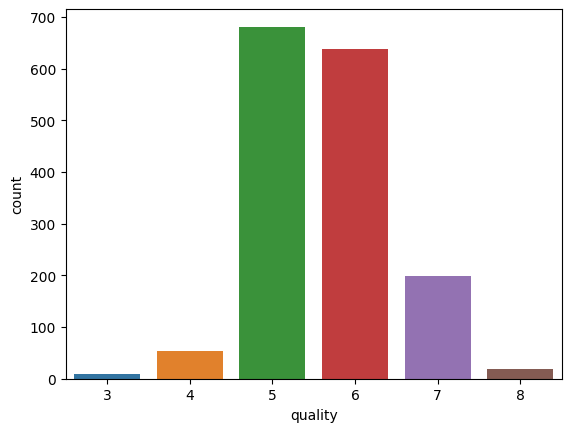

In [62]:
# Visualisasi distribusi kualitas wine
sns.countplot(x='quality', data=df)
plt.show()

Sebuah diagram batang yang menggambarkan distribusi kualitas wine, yang telah diklasifikasikan menjadi dua kategori: 0 untuk kualitas rendah dan 1 untuk kualitas tinggi. Dari diagram tersebut, kita dapat melihat bahwa ada jumlah yang signifikan lebih banyak wine dengan kualitas rendah (0) dibandingkan dengan wine dengan kualitas tinggi (1). Ini menunjukkan bahwa dalam dataset yang digunakan, ada lebih sedikit contoh wine yang dianggap memiliki kualitas tinggi menurut kriteria yang ditetapkan untuk klasifikasi ini. Diagram seperti ini berguna dalam EDA untuk menilai keseimbangan kelas target dalam tugas klasifikasi.

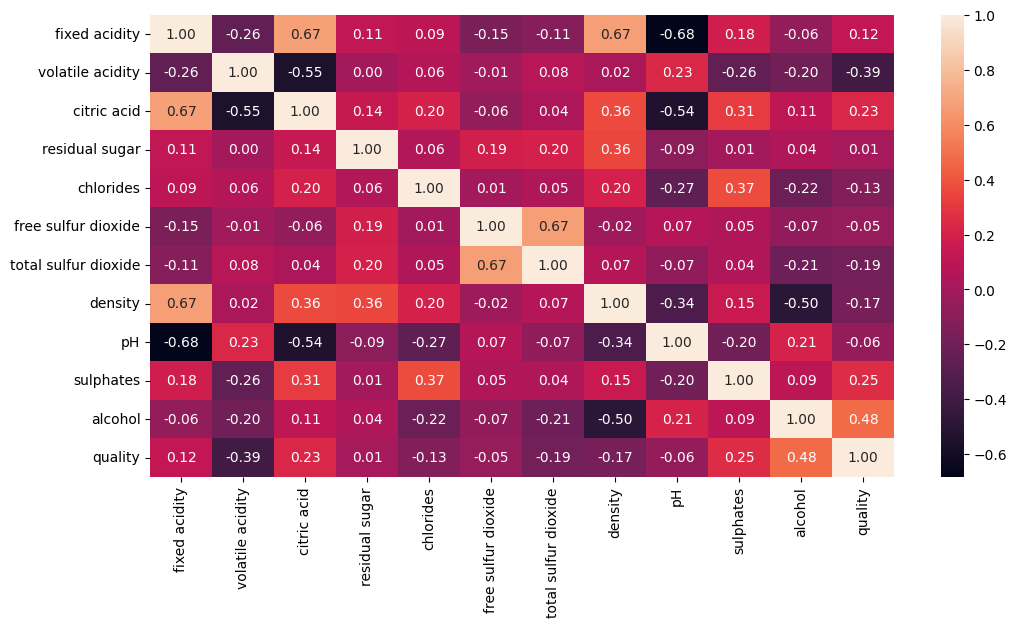

In [63]:
# Korelasi antar fitur
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()


Heatmap ini memberikan visualisasi dari koefisien korelasi Pearson antara setiap pasangan variabel dalam dataset. Nilai korelasi berkisar antara -1 hingga 1, di mana:

- Nilai mendekati 1 menunjukkan korelasi positif yang kuat,
- Nilai mendekati -1 menunjukkan korelasi negatif yang kuat,
- Nilai mendekati 0 menunjukkan tidak ada korelasi.

Misalnya, kita bisa melihat bahwa `fixed acidity` dan `density` memiliki korelasi positif yang relatif tinggi (0.67), sedangkan `fixed acidity` dan `pH` memiliki korelasi negatif yang tinggi (-0.68). Variabel `quality` memiliki korelasi positif dengan `alcohol` (0.41) yang menunjukkan bahwa kualitas wine cenderung lebih baik dengan kandungan alkohol yang lebih tinggi. Korelasi ini dapat membantu dalam memilih fitur yang paling relevan untuk memprediksi kualitas wine dalam model pembelajaran mesin.

prompt: buat kode untuk melakukan train dataset menggunakan neural network classification

In [64]:
# Klasifikasi biner: wine dengan kualitas di atas 6 adalah baik (1), sisanya buruk (0)
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)

# Memisahkan fitur dan label
X = df.drop('quality', axis=1)
y = df['quality']

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



1. **Konversi ke Klasifikasi Biner**: Kualitas wine biasanya dinilai dalam skala numerik. Namun, untuk memudahkan proses klasifikasi menggunakan neural network, kualitas diubah menjadi bentuk biner: 'baik' (1) jika nilai kualitasnya di atas 6 dan 'buruk' (0) jika sebaliknya. Ini memudahkan pembuatan model untuk melakukan klasifikasi biner.

2. **Pemisahan Fitur dan Label**: `X` menjadi kumpulan fitur yang akan digunakan untuk prediksi, dan `y` adalah label (kualitas wine) yang akan diprediksi. Dengan menghilangkan kolom 'quality' dari `X`, kita memisahkan data yang akan digunakan untuk belajar dengan target prediksi yang sebenarnya.

3. **Normalisasi**: Normalisasi data dengan `StandardScaler` mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1. Ini penting untuk neural network agar dapat berkonvergensi lebih cepat dan tidak memiliki bias terhadap fitur dengan skala yang lebih besar.

4. **Pembagian Data**: Data dibagi menjadi set pelatihan dan pengujian menggunakan `train_test_split`. Ini memungkinkan model untuk belajar dari set pelatihan dan kemudian diuji pada set pengujian untuk menilai kinerjanya. `test_size=0.2` berarti 20% dari data akan digunakan untuk pengujian, dan `random_state` diatur untuk memastikan bahwa pembagian data konsisten di seluruh berbagai run.

In [65]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


Kode tersebut mendefinisikan arsitektur untuk model klasifikasi biner menggunakan Keras, sebuah API tingkat tinggi untuk neural networks:

1. **Inisialisasi Model**: `Sequential()` membuat model berurutan, yang merupakan tumpukan lapisan linear.

2. **Menambahkan Lapisan (Layers)**:
   - Lapisan pertama adalah `Dense` layer dengan 12 neuron dan fungsi aktivasi ReLU (`activation='relu'`). `input_dim=X_train.shape[1]` menetapkan jumlah fitur masukan.
   - Lapisan kedua adalah `Dense` layer lain dengan 8 neuron, juga menggunakan aktivasi ReLU.
   - Lapisan ketiga adalah output layer dengan 1 neuron menggunakan aktivasi sigmoid, cocok untuk klasifikasi biner.

3. **Kompilasi Model**: Model dikompilasi dengan:
   - `loss='binary_crossentropy'`, yang adalah fungsi kerugian yang sesuai untuk klasifikasi biner.
   - `optimizer=Adam(learning_rate=0.001)`, yang adalah metode untuk melakukan update bobot jaringan secara efisien.
   - `metrics=['accuracy']` untuk melacak akurasi klasifikasi selama pelatihan dan pengujian.

Ini adalah model dasar dengan dua lapisan tersembunyi yang bisa disesuaikan dan diperluas tergantung pada kompleksitas masalah dan performa yang diinginkan.

In [66]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=165, batch_size=10)

Epoch 1/165
128/128 [==============================] - 2s 5ms/step - loss: 0.6616 - accuracy: 0.6513 - val_loss: 0.4867 - val_accuracy: 0.8531
Epoch 2/165
128/128 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.8671 - val_loss: 0.3549 - val_accuracy: 0.8531
Epoch 3/165
128/128 [==============================] - 1s 4ms/step - loss: 0.3323 - accuracy: 0.8671 - val_loss: 0.3183 - val_accuracy: 0.8531
Epoch 4/165
128/128 [==============================] - 1s 4ms/step - loss: 0.3101 - accuracy: 0.8671 - val_loss: 0.3032 - val_accuracy: 0.8531
Epoch 5/165
128/128 [==============================] - 1s 4ms/step - loss: 0.2999 - accuracy: 0.8671 - val_loss: 0.2957 - val_accuracy: 0.8531
Epoch 6/165
128/128 [==============================] - 1s 4ms/step - loss: 0.2933 - accuracy: 0.8671 - val_loss: 0.2890 - val_accuracy: 0.8531
Epoch 7/165
128/128 [==============================] - 1s 4ms/step - loss: 0.2888 - accuracy: 0.8671 - val_loss: 0.2847 - val_accuracy: 0.8531

Kode tersebut digunakan untuk melatih (fit) model neural network yang telah didefinisikan pada data pelatihan. Berikut adalah detail dari setiap argumen:

- `X_train, y_train`: Data dan label yang digunakan untuk pelatihan.
- `validation_data=(X_test, y_test)`: Data dan label yang digunakan untuk validasi. Model akan dievaluasi terhadap data ini di akhir setiap epoch.
- `epochs=165`: Jumlah lengkap siklus pelatihan melalui seluruh dataset pelatihan. Model akan melihat keseluruhan data pelatihan sebanyak 165 kali.
- `batch_size=10`: Jumlah sampel per pembaharuan gradien. Ini menentukan jumlah sampel yang diproses sebelum model melakukan pembaruan bobot.

Selama proses pelatihan, model akan menggunakan data pelatihan untuk belajar dan data validasi untuk menilai seberapa baik model memprediksi data yang belum dilihat. Informasi yang dikumpulkan selama pelatihan (seperti akurasi dan kerugian di setiap epoch) disimpan dalam objek `history` untuk analisis lebih lanjut.

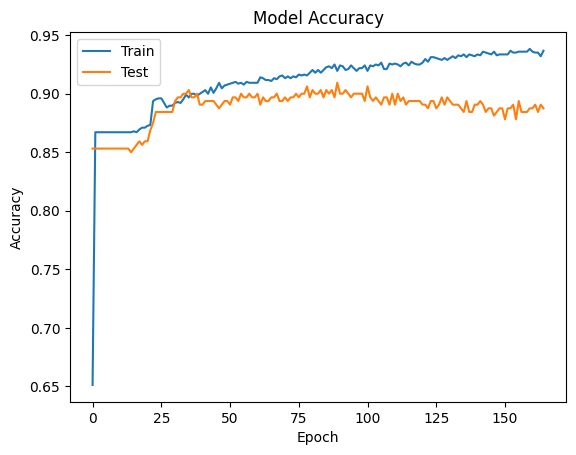

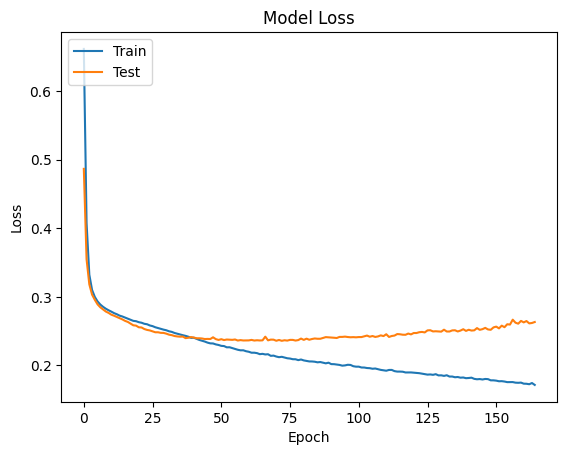

In [67]:
# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Kode ini digunakan untuk memvisualisasikan kinerja model selama proses pelatihan:

- **Plotting Akurasi**:
  - `history.history['accuracy']` menunjukkan akurasi pelatihan di setiap epoch.
  - `history.history['val_accuracy']` menunjukkan akurasi validasi.
  - Grafik ini menggambarkan bagaimana akurasi berubah seiring waktu selama pelatihan.

- **Plotting Loss**:
  - `history.history['loss']` menunjukkan nilai loss pelatihan.
  - `history.history['val_loss']` menunjukkan nilai loss validasi.
  - Grafik ini menggambarkan bagaimana loss berubah seiring waktu selama pelatihan.

Kedua plot ini penting untuk menilai proses pembelajaran model, dimana kita dapat melihat jika model mengalami overfitting, underfitting, atau telah cukup baik dalam mempelajari pola dari data.